### Creating An ANN using Pytorch

In [2]:
import pandas as pd
df=pd.read_csv('./Data/diabetes.csv') # data downloaded from https://www.kaggle.com/uciml/pima-indians-diabetes-database
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns

# while visualtion we use the column Outcome as hue to visulaize the data. But season will take only text string hence we need
# convert 1 --> Diabetic and 0 --> "No Diabetic"

In [5]:
# first i Made a copy of data and I used map function to repace numbers with string (My way)

copy_df = df.copy()
copy_df['Outcome'] = copy_df['Outcome'].map({1:"Diabetic",0:"No Diabetic"})
copy_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


In [5]:
# this is krish naik's way of replacing numbers with string.
# but the changes are made on df . later the same csv file is loaded again. So to avoid that i created copy

import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


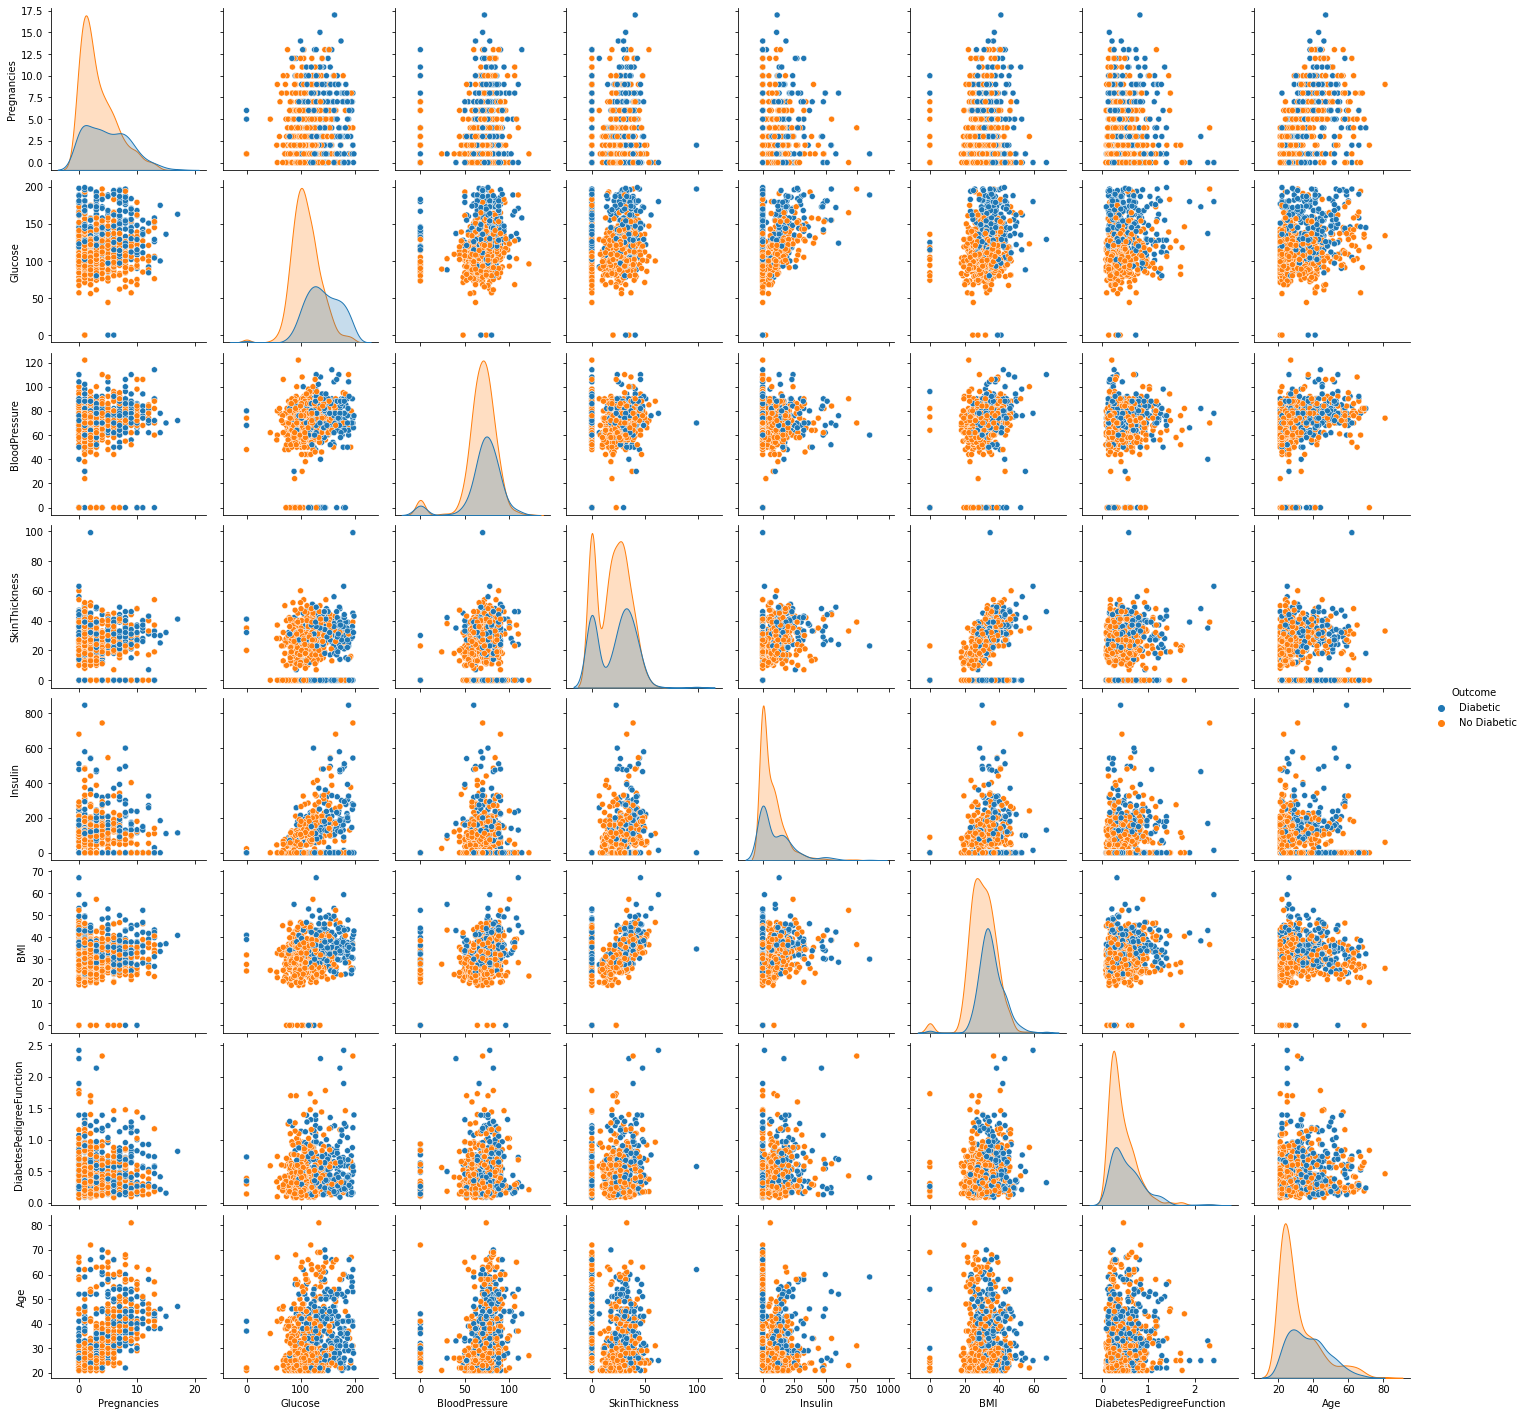

In [6]:
sns.pairplot(copy_df,hue="Outcome")

In [7]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [10]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [11]:
df.shape

(768, 9)

In [12]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [13]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [14]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [15]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01) # lr is learning rate

In [16]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train) # method inside the class ANN_Model
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad() # once loss calculated we need to reduce it
    loss.backward() # back propogation and caclulate derivative
    optimizer.step()

Epoch number: 1 and the loss : 3.457212209701538
Epoch number: 11 and the loss : 0.8019211888313293
Epoch number: 21 and the loss : 0.6090323328971863
Epoch number: 31 and the loss : 0.5917772054672241
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041290283203
Epoch number: 61 and the loss : 0.5410096049308777
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135971307754517
Epoch number: 101 and the loss : 0.5061255693435669
Epoch number: 111 and the loss : 0.4983412027359009
Epoch number: 121 and the loss : 0.4960547685623169
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.47560378909111023
Epoch number: 151 and the loss : 0.47992369532585144
Epoch number: 161 and the loss : 0.4792938232421875
Epoch number: 171 and the loss : 0.4649999141693115
Epoch number: 181 and the loss : 0.458202600479126
Epoch number: 191 and t

In [17]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

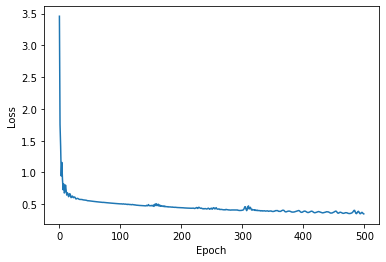

In [18]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [24]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        print(y_pred.argmax().item())
        predictions.append(y_pred.argmax().item()) # output 0 means no diabities and 1 as has diabities
        print(y_pred.argmax().item())

1
1
0
0
0
0
1
1
0
0
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
0
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
0
1
1
0
0
1
1
1
1
0
0
0
0
0
0
0
0
1
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[93, 14],
       [18, 29]], dtype=int64)

Text(69.0, 0.5, 'Predicted Values')

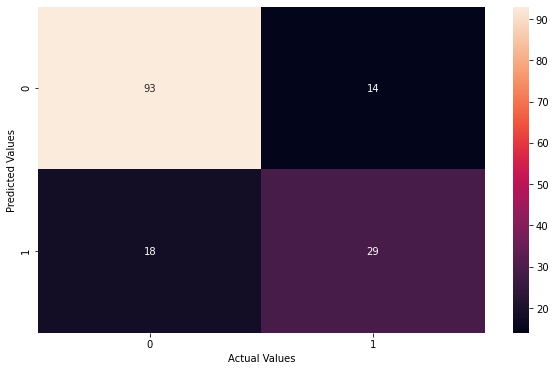

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [26]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

In [27]:
#### Save the model
torch.save(model,'./Model/diabetes.pt')

C:\Users\husssabe\Anaconda3\lib\site-packages\torch\serialization.py:359: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  warnings.warn("Couldn't retrieve source code for container of "


In [28]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [29]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [30]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [31]:
#### New Data to test if the patient has diabites
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [32]:
new_data=torch.tensor(lst1) # convert the above list to tensor- as its already float no need to use floattensor

In [33]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.2133, 1.1058])
0
